In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk import FreqDist
import nltk
from nltk.tokenize import sent_tokenize
import re
from nltk import tokenize
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('cleaned_text.csv')
df.head()

,text,id,label,cleaned_text
0,"Keep your gloves, hats, coats and jackets toge...",122885,Assembly Required,keep glove hat coat jacket togeth need entrywa...
1,"Keep your gloves, hats, coats and jackets toge...",122885,Finish,keep glove hat coat jacket togeth need entrywa...
2,"Keep your gloves, hats, coats and jackets toge...",122885,Hardware Included,keep glove hat coat jacket togeth need entrywa...
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Commercial / Residential,home dynamix serendip ivori ft x ft area r...
4,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Features,home dynamix serendip ivori ft x ft area r...


<AxesSubplot:>

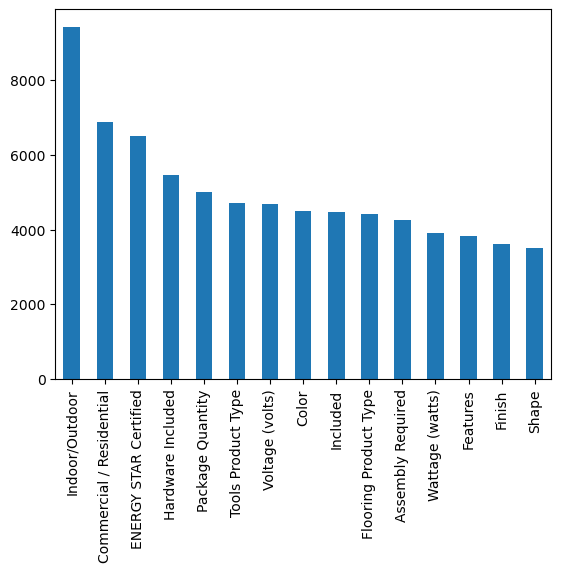

In [3]:
df['label'].value_counts().plot(kind = 'bar')

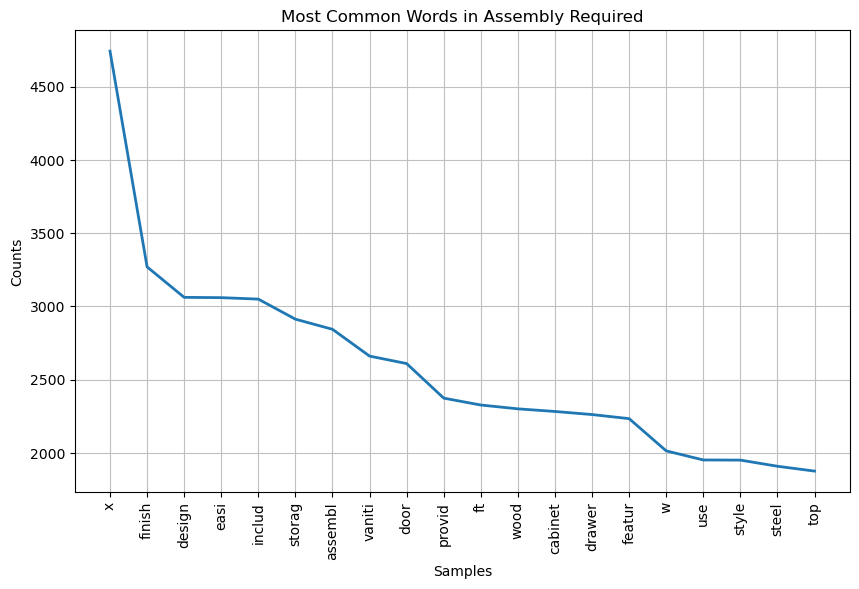

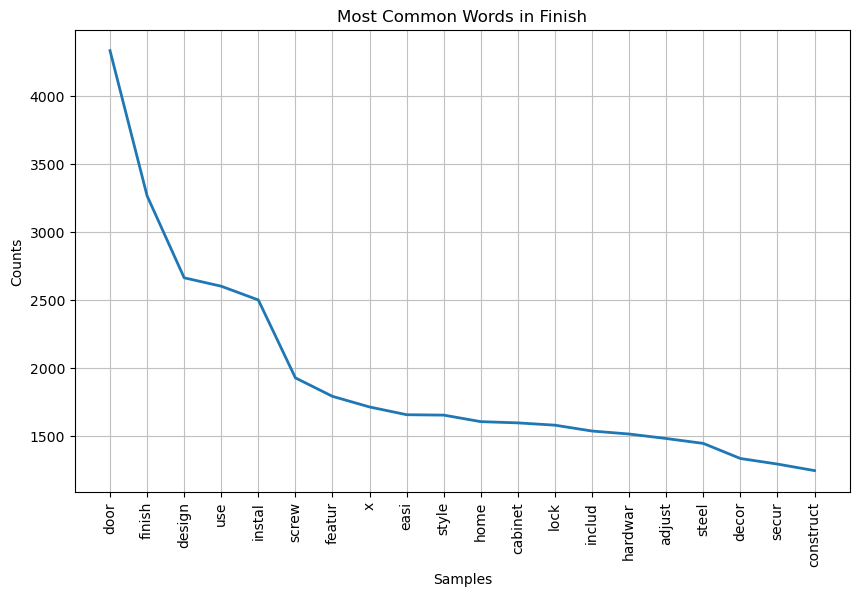

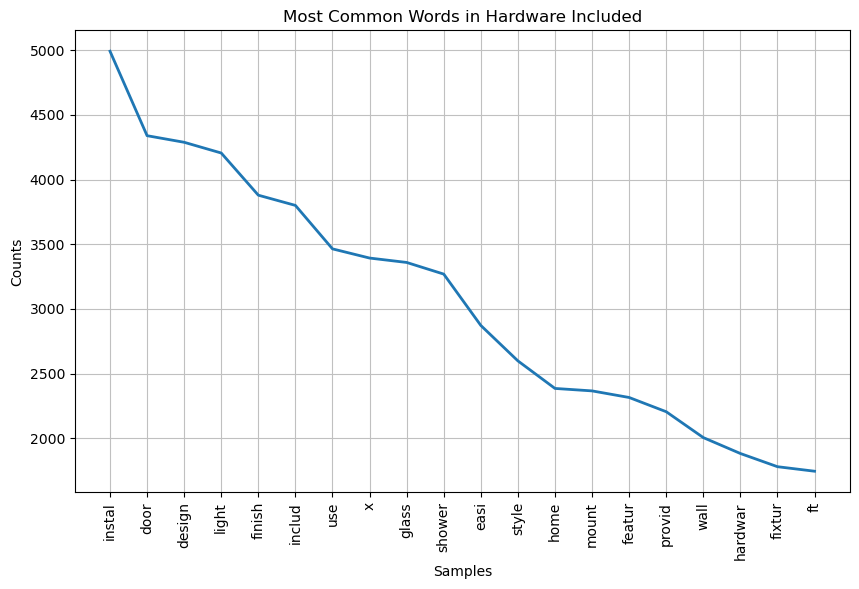

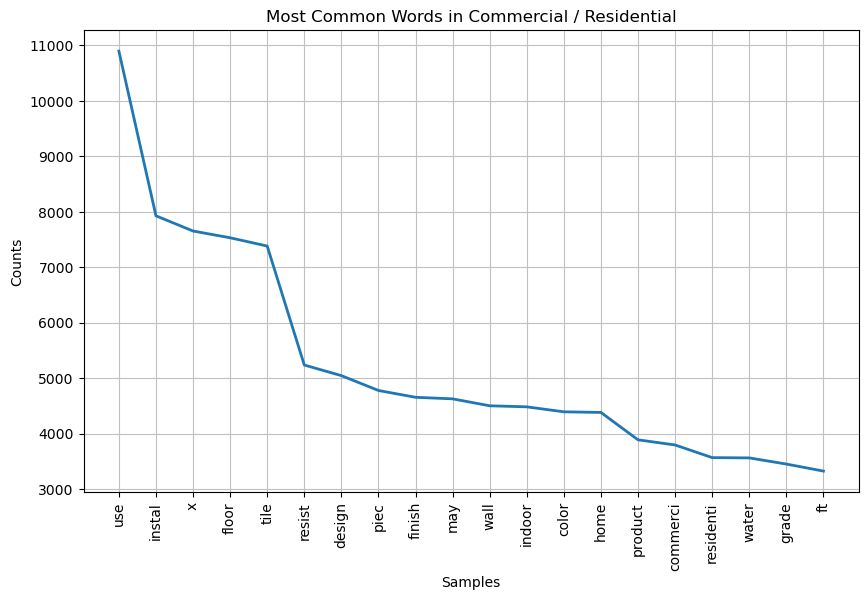

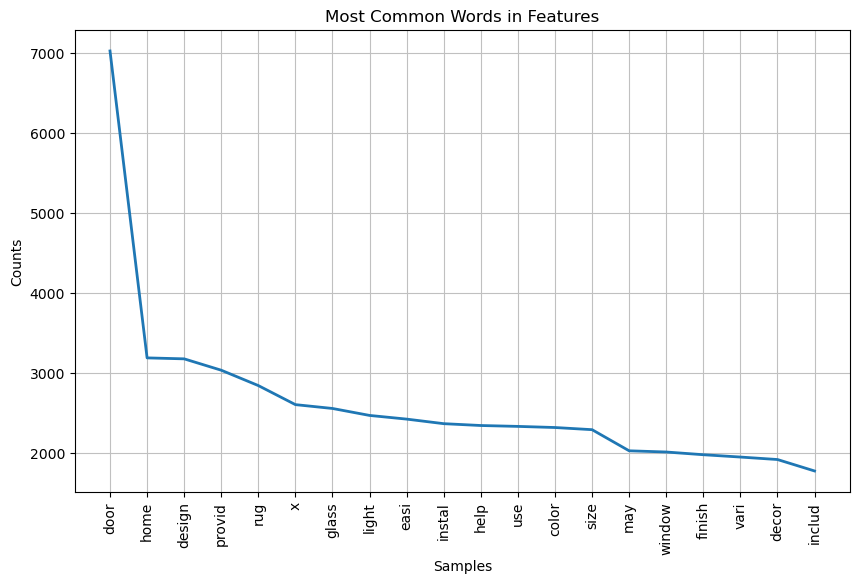

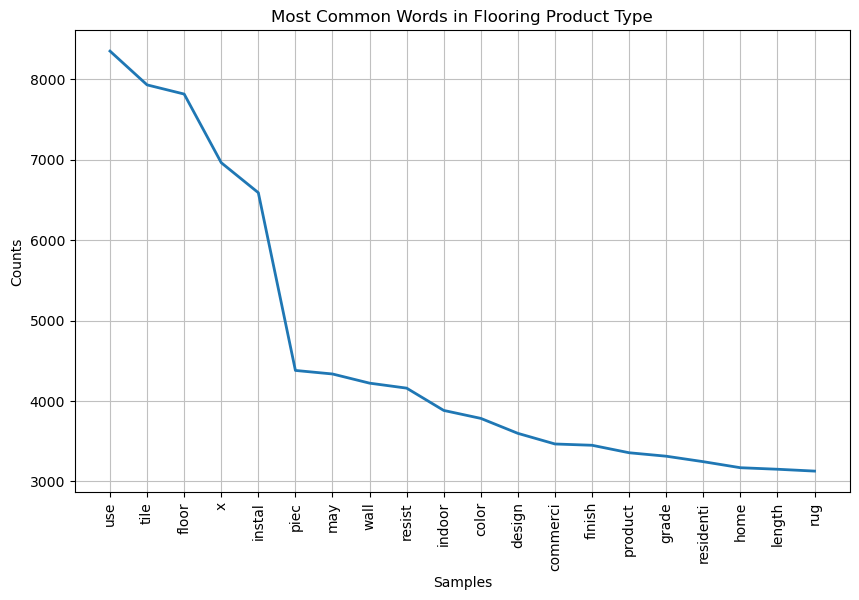

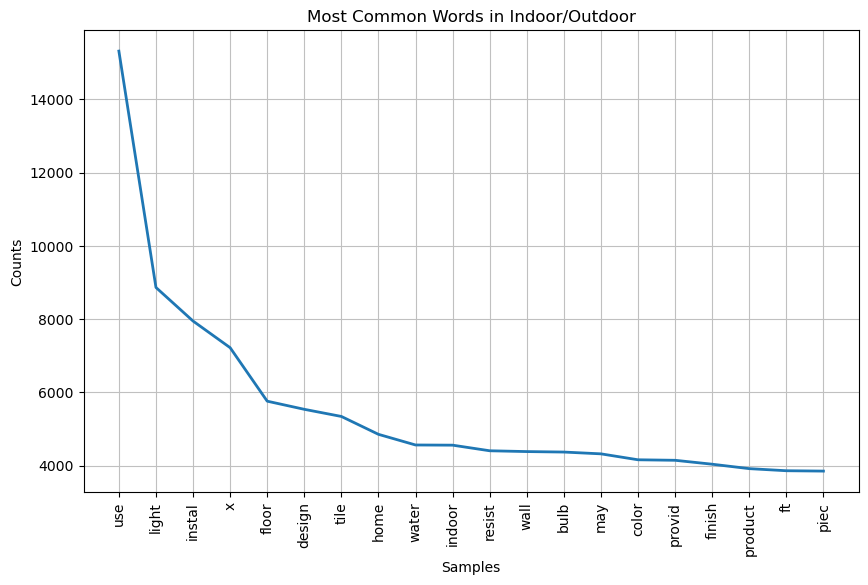

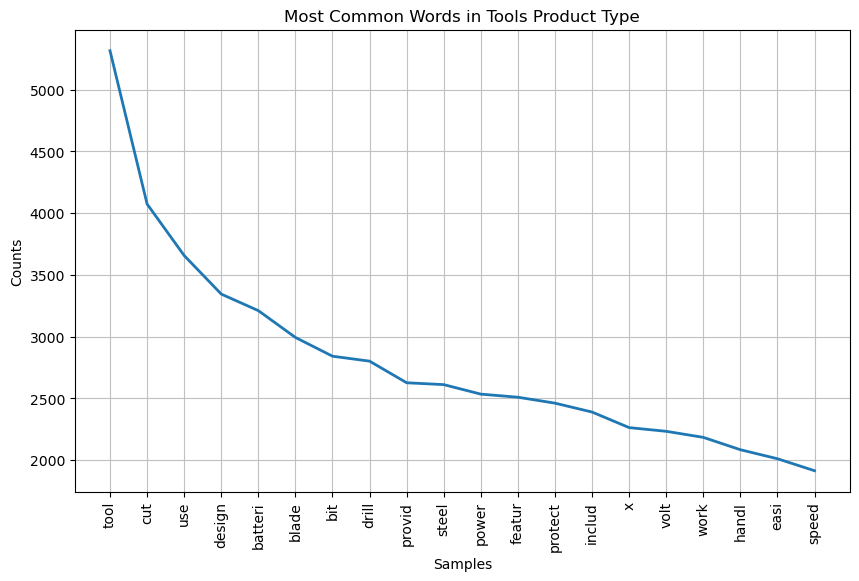

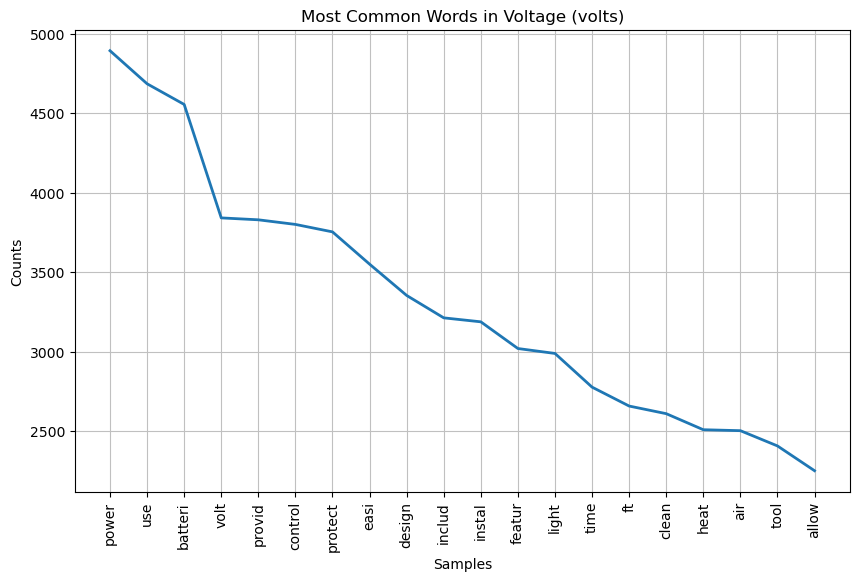

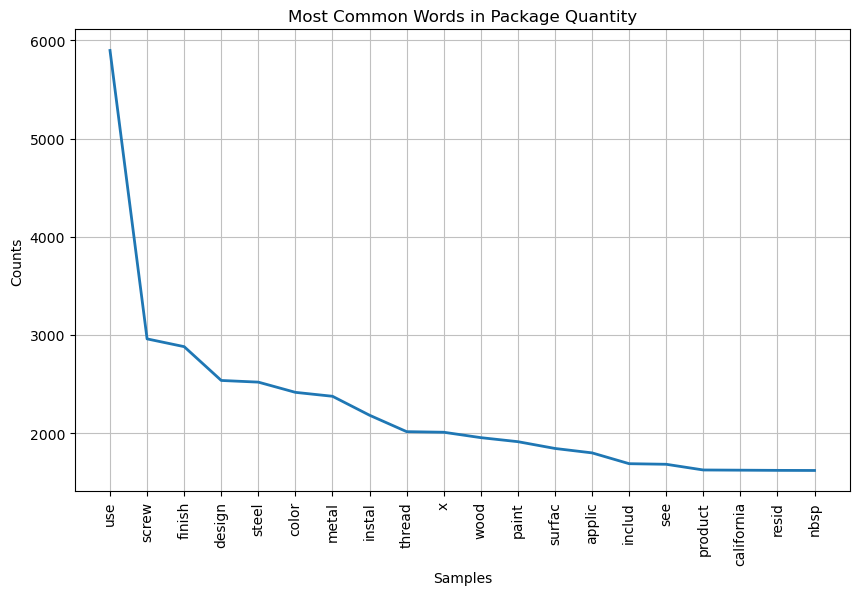

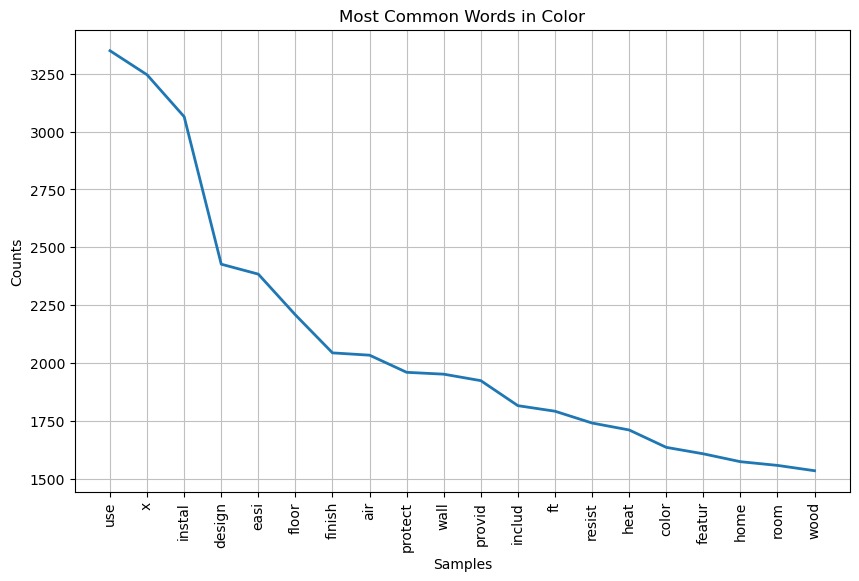

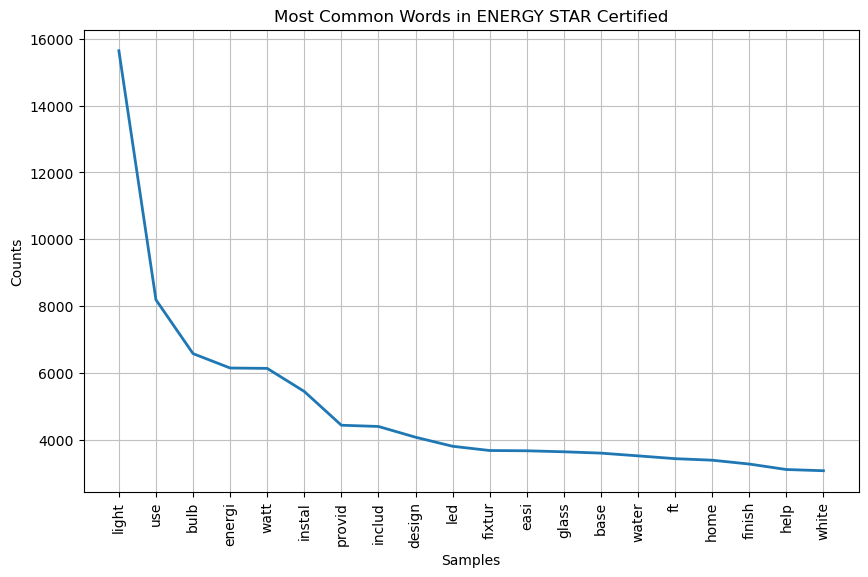

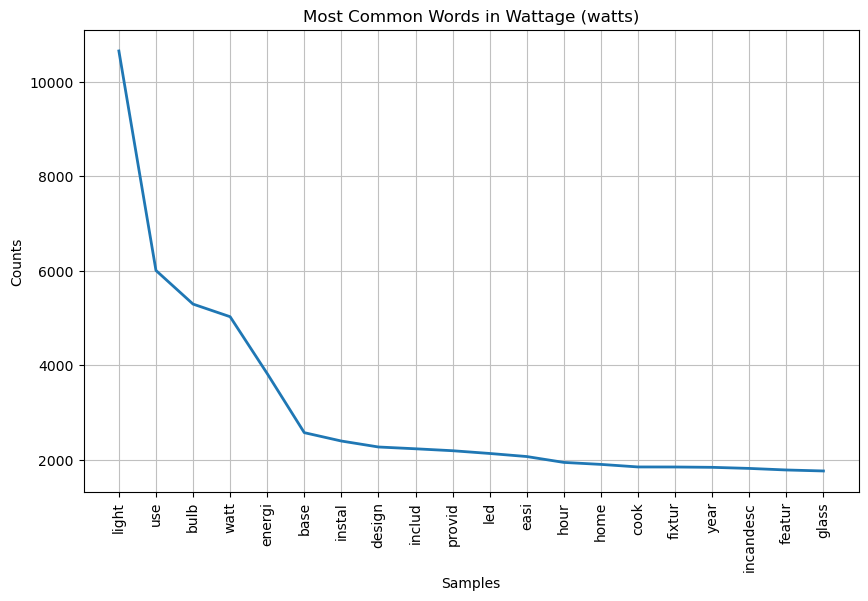

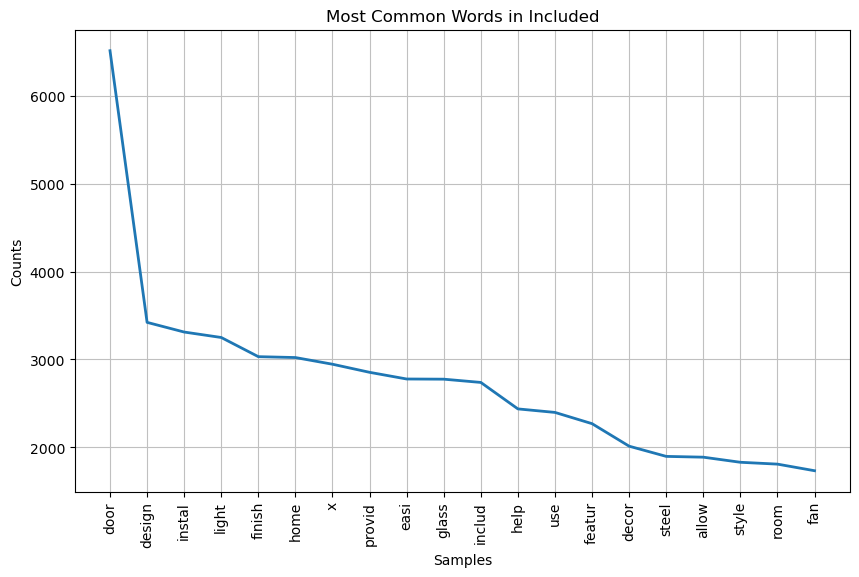

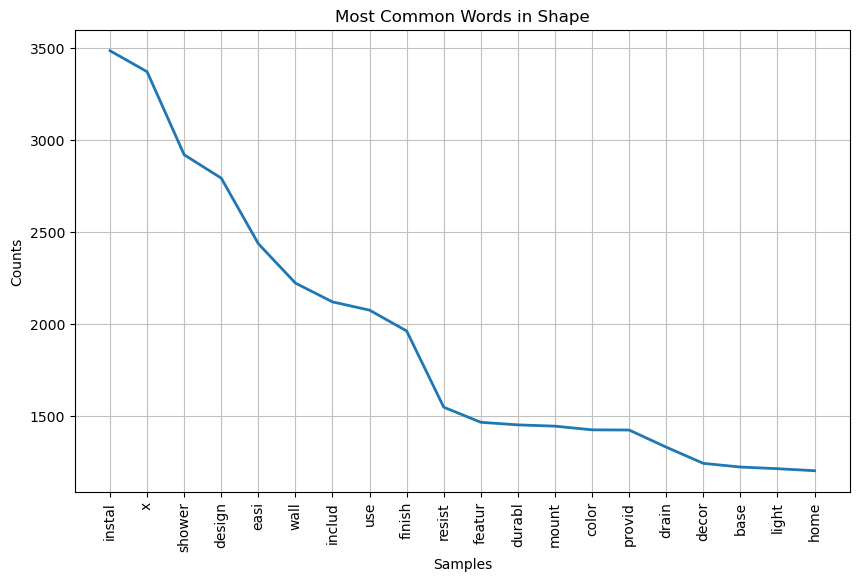

In [4]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

class_word_frequencies = {}

# Iterate through the text and label pairs
for text, label in zip(df['cleaned_text'], df['label']):
    if label not in class_word_frequencies:
        class_word_frequencies[label] = FreqDist(text.split())
    else:
        class_word_frequencies[label].update(text.split())

# Visualize the most frequent words for each class
for label, freq_dist in class_word_frequencies.items():
    plt.figure(figsize=(10, 6))
    freq_dist.plot(20, title=f"Most Common Words in {label}")
    plt.show()


In [5]:
# x ,ft and w are the wrods that does not have any meaning and are in the text
# since i removed  the int from 10ft x 12ft  this format so removing those words
import re

def remove_specific_words(text):
    words_to_remove = ["ft", "w", "x"]
    pattern = r'\b(?:' + '|'.join(re.escape(word) for word in words_to_remove) + r')\b'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text
df['cleaned_text'] = df['cleaned_text'].apply(remove_specific_words)

### AVG sentence length for differnt labels

In [6]:

label_sentence_lengths = {}

# average len of each sentence for different label
for text, label in zip(df['cleaned_text'], df['label']):
    sentences = sent_tokenize(text)
    
    sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
    
    # Store the sentence lengths for the label
    if label not in label_sentence_lengths:
        label_sentence_lengths[label] = sentence_lengths
    else:
        label_sentence_lengths[label].extend(sentence_lengths)

# Calculate and print the average sentence length for each label
for label, lengths in label_sentence_lengths.items():
    average_length = sum(lengths) / len(lengths) if len(lengths) > 0 else 0
    print(f"{label}: {int(average_length)}")

Assembly Required: 95
Finish: 65
Hardware Included: 78
Commercial / Residential: 105
Features: 109
Flooring Product Type: 113
Indoor/Outdoor: 93
Tools Product Type: 88
Voltage (volts): 120
Package Quantity: 62
Color: 81
ENERGY STAR Certified: 98
Wattage (watts): 92
Included: 99
Shape: 82


### AVG sentence length

In [7]:
text_len = [len(x) for x in df['cleaned_text']]
sum(text_len) / len(text_len)

624.685042513273

### top 50  frequent words occurring across all labels

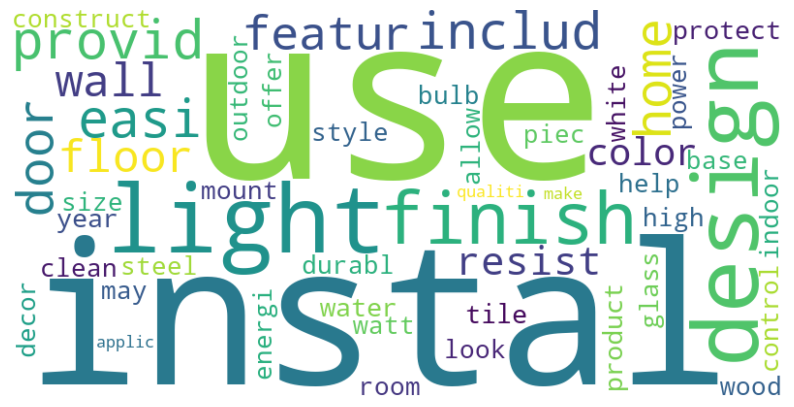

In [8]:
global_freq_dist = FreqDist()

# Iterate through the text and label pairs
for text, label in zip(df['cleaned_text'], df['label']):
    global_freq_dist.update(text.split())

# Get the top 30 frequent words
top_30_words = global_freq_dist.most_common(50)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(top_30_words))

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# PART 2

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word',max_features=5000)
data = cv.fit_transform(df['cleaned_text'])

df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head()

,_blank,_c,aa,aaa,ab,abil,abl,abras,absolut,absorb,...,young,yourself,zamma,zealand,zero,zinc,zip,zipper,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for x in df_dtm.columns:
    print(x,'->>>>' , np.sum(df_dtm[x]))

_blank ->>>> 117
_c ->>>> 75
aa ->>>> 671
aaa ->>>> 341
ab ->>>> 734
abil ->>>> 663
abl ->>>> 586
abras ->>>> 2393
absolut ->>>> 201
absorb ->>>> 1144
absorpt ->>>> 4071
abstract ->>>> 104
abund ->>>> 298
abus ->>>> 158
ac ->>>> 1632
acacia ->>>> 110
acceler ->>>> 87
accent ->>>> 6134
accentu ->>>> 244
accept ->>>> 2384
access ->>>> 4477
accessori ->>>> 4298
accident ->>>> 356
accommod ->>>> 3105
accompani ->>>> 83
accomplish ->>>> 119
accord ->>>> 2742
account ->>>> 3959
accu ->>>> 93
accumul ->>>> 92
accur ->>>> 3545
accuraci ->>>> 417
aceton ->>>> 217
achiev ->>>> 1568
acid ->>>> 325
acoust ->>>> 121
acq ->>>> 103
acr ->>>> 96
across ->>>> 861
acryl ->>>> 3406
act ->>>> 1420
action ->>>> 1115
activ ->>>> 1982
actual ->>>> 1718
actuat ->>>> 224
ad ->>>> 7008
ada ->>>> 1478
adapt ->>>> 1883
adaptable ->>>> 75
adaptor ->>>> 204
add ->>>> 13716
addit ->>>> 7731
address ->>>> 196
adequ ->>>> 86
adher ->>>> 752
adhes ->>>> 2780
adirondack ->>>> 117
adjac ->>>> 168
adjoin ->>>> 80
adjust -

brochur ->>>> 71
broil ->>>> 430
broiler ->>>> 120
broken ->>>> 198
bronz ->>>> 6453
brought ->>>> 88
brown ->>>> 2148
bruce ->>>> 607
brush ->>>> 4664
brushless ->>>> 759
btu ->>>> 1940
bu ->>>> 137
bubbl ->>>> 319
buck ->>>> 156
bucket ->>>> 362
buckl ->>>> 86
budget ->>>> 192
bug ->>>> 442
bugl ->>>> 81
build ->>>> 6478
builder ->>>> 1069
buildup ->>>> 306
built ->>>> 6064
bulb ->>>> 20618
bulbbulb ->>>> 341
bulbhighlight ->>>> 124
bulbid ->>>> 364
bulblight ->>>> 93
bulbs ->>>> 88
bulbsbulb ->>>> 219
bulbshighlight ->>>> 134
bulk ->>>> 175
bulki ->>>> 278
bull ->>>> 76
bullet ->>>> 114
bullnos ->>>> 451
bump ->>>> 471
bumper ->>>> 275
bumpguard ->>>> 84
bunch ->>>> 76
bundl ->>>> 104
bunge ->>>> 97
burgundi ->>>> 112
burial ->>>> 113
burn ->>>> 1098
burner ->>>> 1158
burnish ->>>> 109
burnt ->>>> 113
burr ->>>> 75
burst ->>>> 120
bush ->>>> 207
busi ->>>> 1530
business ->>>> 70
buss ->>>> 258
butter ->>>> 116
butterfli ->>>> 91
butterscotch ->>>> 69
button ->>>> 2685
buy ->>>> 3049

countersink ->>>> 176
countersunk ->>>> 166
countertop ->>>> 3365
counti ->>>> 107
countri ->>>> 773
coupl ->>>> 602
coupler ->>>> 401
cours ->>>> 276
court ->>>> 159
courtyard ->>>> 76
cove ->>>> 261
cover ->>>> 7630
coverag ->>>> 860
covered ->>>> 79
cozi ->>>> 280
cpvc ->>>> 74
cr ->>>> 94
crack ->>>> 1808
crackl ->>>> 145
cradl ->>>> 173
craft ->>>> 3180
craftsman ->>>> 451
craftsmanship ->>>> 1310
crank ->>>> 222
crate ->>>> 74
cream ->>>> 419
creat ->>>> 11742
creation ->>>> 140
creativ ->>>> 443
credenza ->>>> 73
credit ->>>> 199
cree ->>>> 347
creek ->>>> 109
crevic ->>>> 188
cri ->>>> 241
crimp ->>>> 151
crisp ->>>> 574
crisper ->>>> 420
critic ->>>> 123
croft ->>>> 82
cross ->>>> 1143
crown ->>>> 999
cruis ->>>> 103
crush ->>>> 325
crystal ->>>> 1380
crystalguard ->>>> 83
csa ->>>> 1252
csed ->>>> 92
ct ->>>> 195
cu ->>>> 3114
cub ->>>> 152
cubbi ->>>> 102
cube ->>>> 324
cue ->>>> 71
cul ->>>> 294
cultur ->>>> 79
cup ->>>> 1287
cupc ->>>> 231
curb ->>>> 659
curbsid ->>>> 243


expand ->>>> 1243
expans ->>>> 945
expect ->>>> 708
expens ->>>> 597
experi ->>>> 1729
experienc ->>>> 101
expert ->>>> 112
expertli ->>>> 414
explor ->>>> 83
expos ->>>> 1163
exposur ->>>> 396
express ->>>> 344
exquisit ->>>> 520
extend ->>>> 3870
extens ->>>> 1958
exterior ->>>> 4708
extern ->>>> 537
extra ->>>> 4241
extract ->>>> 198
extraordinari ->>>> 132
extravag ->>>> 441
extrem ->>>> 1912
extrud ->>>> 462
extrus ->>>> 72
exud ->>>> 100
eye ->>>> 1278
ez ->>>> 604
fabric ->>>> 3779
fabritec ->>>> 73
face ->>>> 1443
facepl ->>>> 228
facet ->>>> 110
facil ->>>> 257
facilit ->>>> 239
fact ->>>> 229
factor ->>>> 334
factori ->>>> 1770
fade ->>>> 3196
fading ->>>> 79
fadingeasi ->>>> 98
fadingvacuum ->>>> 190
fahrenheit ->>>> 436
failur ->>>> 335
fairview ->>>> 74
fall ->>>> 593
fals ->>>> 93
famili ->>>> 2786
familiar ->>>> 98
famou ->>>> 79
fan ->>>> 13906
faq ->>>> 496
far ->>>> 254
farm ->>>> 252
fasad ->>>> 72
fascia ->>>> 76
fashion ->>>> 1815
fast ->>>> 3929
fasten ->>>> 5018


hinges ->>>> 98
hint ->>>> 94
hip ->>>> 98
histor ->>>> 181
histori ->>>> 83
hit ->>>> 333
hitachi ->>>> 660
hitch ->>>> 135
hobbi ->>>> 266
hold ->>>> 4307
holder ->>>> 1097
hole ->>>> 6183
holiday ->>>> 1553
hollow ->>>> 515
home ->>>> 35347
homedepot ->>>> 3661
homefor ->>>> 80
homehom ->>>> 201
homelin ->>>> 442
homeown ->>>> 768
homepat ->>>> 148
homepleas ->>>> 73
honda ->>>> 106
hone ->>>> 221
honey ->>>> 282
honeycomb ->>>> 137
honeywel ->>>> 168
honor ->>>> 76
hood ->>>> 1023
hook ->>>> 3315
hookup ->>>> 90
hoover ->>>> 72
hopper ->>>> 100
horizont ->>>> 1308
horn ->>>> 159
horsepow ->>>> 158
hose ->>>> 3056
hospit ->>>> 349
host ->>>> 92
hot ->>>> 3535
hotel ->>>> 1065
hour ->>>> 10117
hours ->>>> 90
hous ->>>> 4739
household ->>>> 2226
howev ->>>> 139
hp ->>>> 1574
hr ->>>> 1330
href ->>>> 117
http ->>>> 471
hub ->>>> 304
hue ->>>> 479
huge ->>>> 139
hugger ->>>> 83
hum ->>>> 79
human ->>>> 150
humid ->>>> 1137
humidifi ->>>> 184
humidityproduct ->>>> 78
hundr ->>>> 115
hung

listedinclud ->>>> 93
listednot ->>>> 156
lit ->>>> 909
lite ->>>> 1229
liter ->>>> 131
lithium ->>>> 3475
lithonia ->>>> 557
littl ->>>> 1110
live ->>>> 4894
lo ->>>> 92
load ->>>> 6280
local ->>>> 1335
locat ->>>> 3518
locations ->>>> 78
locationsgreat ->>>> 80
locationssuppli ->>>> 113
lock ->>>> 10210
lockabl ->>>> 234
locker ->>>> 151
locknut ->>>> 78
lockout ->>>> 214
lockset ->>>> 466
lodg ->>>> 89
loft ->>>> 209
log ->>>> 459
logo ->>>> 234
lok ->>>> 179
long ->>>> 10044
longer ->>>> 3063
longest ->>>> 109
longev ->>>> 387
longzinc ->>>> 99
look ->>>> 18093
lookoutfit ->>>> 143
lookpowd ->>>> 71
lookus ->>>> 84
loom ->>>> 473
loop ->>>> 977
loos ->>>> 339
loosen ->>>> 302
lose ->>>> 359
loss ->>>> 376
lost ->>>> 140
lot ->>>> 447
loud ->>>> 71
loung ->>>> 277
louver ->>>> 1049
love ->>>> 772
lover ->>>> 73
low ->>>> 11292
lower ->>>> 2630
lowest ->>>> 116
lp ->>>> 269
lpg ->>>> 74
ls ->>>> 85
lubric ->>>> 370
lug ->>>> 281
lumbar ->>>> 457
lumber ->>>> 873
lumen ->>>> 2733
lume

otherwis ->>>> 74
ottoman ->>>> 197
out ->>>> 191
outag ->>>> 411
outdat ->>>> 72
outdoor ->>>> 17576
outdura ->>>> 83
outer ->>>> 497
outfit ->>>> 172
outlast ->>>> 73
outlet ->>>> 3177
outlin ->>>> 71
output ->>>> 2144
outsid ->>>> 3709
outstand ->>>> 482
outward ->>>> 154
oval ->>>> 704
oven ->>>> 3398
overag ->>>> 3941
overal ->>>> 1428
overflow ->>>> 691
overh ->>>> 302
overhang ->>>> 75
overhead ->>>> 568
overheat ->>>> 229
overlap ->>>> 456
overlay ->>>> 214
overlayhighli ->>>> 70
overload ->>>> 793
overrid ->>>> 267
overs ->>>> 378
owen ->>>> 76
owner ->>>> 298
oxid ->>>> 1177
oxygen ->>>> 129
oz ->>>> 1180
ozon ->>>> 165
pace ->>>> 282
pacif ->>>> 264
pack ->>>> 4731
packag ->>>> 2017
packsfor ->>>> 82
packstainless ->>>> 209
packsteel ->>>> 559
pad ->>>> 3066
paddl ->>>> 332
padlock ->>>> 180
page ->>>> 309
pagehom ->>>> 70
pagenot ->>>> 250
pagetrust ->>>> 85
paint ->>>> 8652
paintabl ->>>> 403
paintedsold ->>>> 92
painter ->>>> 109
paintingmad ->>>> 213
pair ->>>> 2044
pair

redlithium ->>>> 405
reduc ->>>> 7570
reduct ->>>> 456
redwood ->>>> 136
reed ->>>> 153
reel ->>>> 316
refer ->>>> 722
referenc ->>>> 215
refil ->>>> 697
refin ->>>> 553
reflect ->>>> 1274
reflector ->>>> 417
refresh ->>>> 848
refriger ->>>> 2440
regard ->>>> 241
regardless ->>>> 84
regist ->>>> 678
registr ->>>> 102
regul ->>>> 747
regular ->>>> 663
regularli ->>>> 1716
reheat ->>>> 180
reinforc ->>>> 2171
reinforcementresidenti ->>>> 102
reinstal ->>>> 72
reject ->>>> 76
rejuven ->>>> 80
rel ->>>> 80
relat ->>>> 116
relax ->>>> 1485
relay ->>>> 78
releas ->>>> 1263
reli ->>>> 133
reliabl ->>>> 2607
relief ->>>> 530
reliev ->>>> 158
reload ->>>> 83
remain ->>>> 967
remark ->>>> 156
rememb ->>>> 188
remind ->>>> 93
reminisc ->>>> 300
remnant ->>>> 70
remodel ->>>> 812
remot ->>>> 3330
remov ->>>> 7917
render ->>>> 177
renew ->>>> 444
renov ->>>> 366
reorder ->>>> 72
repair ->>>> 1065
repeat ->>>> 412
repel ->>>> 754
repetit ->>>> 76
replac ->>>> 6470
replacementsautomat ->>>> 89
replic

soapi ->>>> 133
socket ->>>> 2232
sodium ->>>> 83
sofa ->>>> 204
soffit ->>>> 82
soft ->>>> 7578
soften ->>>> 322
softer ->>>> 156
softli ->>>> 145
softspr ->>>> 87
softwar ->>>> 79
softwood ->>>> 70
soho ->>>> 115
soil ->>>> 1490
solar ->>>> 1579
sold ->>>> 10920
solder ->>>> 204
sole ->>>> 141
solid ->>>> 8088
solut ->>>> 3998
solvent ->>>> 346
someon ->>>> 83
somerset ->>>> 78
someth ->>>> 173
sometim ->>>> 122
son ->>>> 96
sone ->>>> 191
sonic ->>>> 261
sooth ->>>> 458
sophist ->>>> 1664
sort ->>>> 74
sound ->>>> 1772
sourc ->>>> 929
sourcehedrix ->>>> 215
south ->>>> 138
southern ->>>> 107
southwir ->>>> 422
sp ->>>> 76
spa ->>>> 924
space ->>>> 13003
spaceinclud ->>>> 103
spacer ->>>> 247
spaces ->>>> 74
spaciou ->>>> 645
spade ->>>> 74
span ->>>> 357
spanish ->>>> 167
spare ->>>> 250
spark ->>>> 390
sparkl ->>>> 638
spax ->>>> 77
speak ->>>> 168
speaker ->>>> 531
spec ->>>> 207
speci ->>>> 1472
special ->>>> 2652
specialist ->>>> 124
specialti ->>>> 385
specif ->>>> 2383
specifi

troubl ->>>> 262
trowel ->>>> 271
tru ->>>> 71
truck ->>>> 337
truclos ->>>> 94
true ->>>> 1301
trugrass ->>>> 140
truli ->>>> 497
trunk ->>>> 85
truport ->>>> 74
truss ->>>> 191
trust ->>>> 1077
tub ->>>> 3233
tube ->>>> 1774
tubular ->>>> 525
tuck ->>>> 128
tuft ->>>> 1094
tumbl ->>>> 475
tumbler ->>>> 141
tune ->>>> 180
tungsten ->>>> 181
tunnel ->>>> 139
turbo ->>>> 177
turf ->>>> 545
turkey ->>>> 100
turkeystain ->>>> 167
turn ->>>> 5629
turntabl ->>>> 145
tuscan ->>>> 135
tuscani ->>>> 123
tuv ->>>> 104
tv ->>>> 1288
twice ->>>> 347
twin ->>>> 702
twinkl ->>>> 128
twist ->>>> 1131
two ->>>> 7495
type ->>>> 4556
typic ->>>> 985
uf ->>>> 139
ul ->>>> 3727
ultim ->>>> 1379
ultra ->>>> 2745
ultrason ->>>> 93
umbrella ->>>> 297
unaffect ->>>> 97
unassembl ->>>> 78
unauthor ->>>> 106
unbeat ->>>> 88
unbreak ->>>> 203
uncompromis ->>>> 78
underfoot ->>>> 317
underground ->>>> 256
underlay ->>>> 854
underlaymentappropri ->>>> 258
undermount ->>>> 122
underneath ->>>> 230
undersid ->>>> 6

### Input with multiple outputs

In [11]:
result = df.groupby("text")['label'].count().sort_values(ascending=False).reset_index()
result_df = pd.DataFrame(result)
result_df

,text,label
0,Polyblend 8 fl. oz. Grout Renew Colorant is a ...,6
1,The Charleston 52 in. indoor ceiling fan is En...,6
2,The AirPro Indoor/Outdoor ceiling fan offers g...,5
3,The Westinghouse Turbo Swirl 30 in. Indoor Ant...,5
4,"With a brushed nickel finish, 3 reversible C73...",5
...,...,...
41564,The Husky 5-Piece Universal SAE Ratcheting Wre...,1
41565,The Husky 5-Piece SAE Reversible Ratcheting Wr...,1
41566,The Husky 5-Piece Metric Universal Ratcheting ...,1
41567,Ideal for a bathroom or power room with limite...,1


## noise remove after Label Powerset

In [63]:
label = pd.read_csv("train_label (2).csv")
data = pd.read_csv("train_data (1).csv")
df = data.merge(label , on ='id' , how = 'inner')
df.head()

,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,Assembly Required
1,"Keep your gloves, hats, coats and jackets toge...",122885,Finish
2,"Keep your gloves, hats, coats and jackets toge...",122885,Hardware Included
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Commercial / Residential
4,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Features


In [64]:
# LabelPowerSet
# consider label : pink green red , red green pink -----are same , sequence Doesent matter
# groupby and clean or clean and then groupy , Check which ones is correct

In [65]:
df = df.groupby('text').agg({'id': 'first', 'label': list}).reset_index()

In [66]:
df['label'] = df['label'].apply(lambda x: ','.join(x))
df.head()

,text,id,label
0,"""Constructor"" Prelude door locks feature moder...",161324,"Finish,Hardware Included"
1,"""Constructor"" Prelude door locks feature moder...",211995,"Finish,Hardware Included"
2,"""Constructor"" offers premium classic style doo...",201117,"Finish,Hardware Included"
3,"""Constructor"" offers premium classic style doo...",170141,"Finish,Hardware Included"
4,"""Constructor"" offers premium classic style doo...",164783,"Finish,Hardware Included"


In [67]:
for x in df['label']:
    print(x)

Finish,Hardware Included
Finish,Hardware Included
Finish,Hardware Included
Finish,Hardware Included
Finish,Hardware Included
Color
Color
ENERGY STAR Certified
Hardware Included,Package Quantity
Commercial / Residential,Flooring Product Type
Tools Product Type
ENERGY STAR Certified,Voltage (volts)
Tools Product Type
Package Quantity
Package Quantity
Tools Product Type
Package Quantity
Indoor/Outdoor
Hardware Included
Assembly Required,Hardware Included
Tools Product Type
Tools Product Type
Tools Product Type
Features,Included,Indoor/Outdoor
Color,Package Quantity,Shape
Commercial / Residential,Flooring Product Type,Indoor/Outdoor
Commercial / Residential,Flooring Product Type,Indoor/Outdoor
Commercial / Residential,Flooring Product Type,Indoor/Outdoor
Package Quantity
Color
Package Quantity
Commercial / Residential
Commercial / Residential
Package Quantity
Package Quantity
Color,Shape
Color,Shape
Indoor/Outdoor
Indoor/Outdoor
Flooring Product Type
Package Quantity
Included,Tools Product